## Desafío 2, el regreso de Properatti

#### Grupo 1

Marcelo Beguisristain beguiris@yahoo.com.ar

Santiago Caraballo santiagocaraballo@gmail.com

Francisco Cossavella franciscocossavella@gmail.com

Maximiliano Zavala maximilian.zvl@gmail.com


## Objetivo

Implementar un modelo de regresion lineal multiple sobre la base "limpia" de Properatti


### Importación de librerías:

In [343]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

Seteamos parámetros para gráficos.

In [344]:
plt.rcParams['savefig.bbox'] = "tight"
style.use('dark_background') or plt.style.use('dark_background')

Importación del dataset resultado del Desafío 1

In [345]:
data = pd.read_csv('caba_properatti_desafio_2')
data.head()

,id_propiedad,property_type,place_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd,price_usd_per_m2,rooms,cochera,amenities,a estrenar,dist_subte_km_prom_barrio
0,1,apartment,Mataderos,72000.0,USD,55.0,55.0,72000.0,1309.090909,1.0,0,0,0,5.436760
1,2,apartment,Belgrano,138000.0,USD,45.0,40.0,138000.0,3066.666667,1,0,1,1,1.068329
2,3,apartment,Belgrano,195000.0,USD,65.0,60.0,195000.0,3000.000000,1,0,1,1,1.068329
3,4,apartment,Palermo Soho,111700.0,USD,50.0,30.0,111700.0,2234.000000,1.0,0,1,0,0.835807
4,5,apartment,Palermo Soho,147900.0,USD,42.0,31.0,147900.0,3521.428571,1.0,0,1,0,0.835807


In [346]:
data.isna().mean()

id_propiedad                 0.0
property_type                0.0
place_name                   0.0
price                        0.0
currency                     0.0
surface_total_in_m2          0.0
surface_covered_in_m2        0.0
price_aprox_usd              0.0
price_usd_per_m2             0.0
rooms                        0.0
cochera                      0.0
amenities                    0.0
a estrenar                   0.0
dist_subte_km_prom_barrio    0.0
dtype: float64

In [347]:
data.dtypes

id_propiedad                   int64
property_type                 object
place_name                    object
price                        float64
currency                      object
surface_total_in_m2          float64
surface_covered_in_m2        float64
price_aprox_usd              float64
price_usd_per_m2             float64
rooms                         object
cochera                        int64
amenities                      int64
a estrenar                     int64
dist_subte_km_prom_barrio    float64
dtype: object

In [348]:
data.describe()

,id_propiedad,price,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd,price_usd_per_m2,cochera,amenities,a estrenar,dist_subte_km_prom_barrio
count,15261.000000,1.526100e+04,15261.000000,15261.000000,1.526100e+04,15261.000000,15261.000000,15261.000000,15261.000000,15261.000000
mean,11910.954983,1.668704e+05,73.510845,65.061923,1.718461e+05,2476.344823,0.349518,0.396042,0.112902,0.869076
std,7103.819915,1.234398e+05,56.220813,47.616720,1.206708e+05,738.670961,0.476833,0.489089,0.316484,0.954786
min,1.000000,3.114100e+03,13.000000,0.000000,3.420000e+04,600.000000,0.000000,0.000000,0.000000,0.001555
25%,5910.000000,1.000000e+05,43.000000,39.000000,1.040000e+05,2013.422819,0.000000,0.000000,0.000000,0.323137
50%,11377.000000,1.340000e+05,56.000000,50.000000,1.350000e+05,2428.571429,0.000000,0.000000,0.000000,0.570292
75%,17863.000000,1.900000e+05,81.000000,72.000000,1.936000e+05,2879.518072,1.000000,1.000000,0.000000,0.934785
max,25413.000000,1.750000e+06,765.000000,755.000000,1.750000e+06,12053.571429,1.000000,1.000000,1.000000,6.990312


Acá llama la atención que surface_covered tiene valores en 0 aún, vamos a quitar los valores que estén por debajo de los 15m2 porque ese es el mínimo establecido en el código de edificación.

También es raro que rooms sea un object, debería ser numérica y queremos ver qué tipos de valores tiene currency porque en función de lo trabajado en la note anterior debería sólo contener USD.

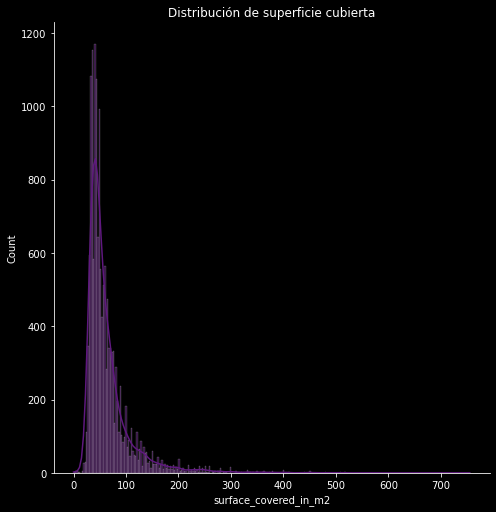

In [349]:
sns.displot(data.surface_covered_in_m2, kde=True, color=sns.color_palette('magma')[1], height=7);
plt.title('Distribución de superficie cubierta');

In [350]:
mask = data['surface_covered_in_m2'] > 15
data[mask].describe()

,id_propiedad,price,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd,price_usd_per_m2,cochera,amenities,a estrenar,dist_subte_km_prom_barrio
count,15242.000000,1.524200e+04,15242.000000,15242.000000,1.524200e+04,15242.000000,15242.000000,15242.000000,15242.000000,15242.000000
mean,11915.853366,1.668684e+05,73.504396,65.135743,1.718219e+05,2476.068858,0.349429,0.396011,0.112912,0.868795
std,7103.972140,1.234444e+05,56.220640,47.600258,1.206922e+05,738.759641,0.476805,0.489083,0.316495,0.954676
min,1.000000,3.114100e+03,16.000000,16.000000,3.420000e+04,600.000000,0.000000,0.000000,0.000000,0.001555
25%,5915.250000,1.000000e+05,43.000000,39.000000,1.040000e+05,2013.224126,0.000000,0.000000,0.000000,0.323208
50%,11383.500000,1.340000e+05,56.000000,50.000000,1.350000e+05,2428.571429,0.000000,0.000000,0.000000,0.570265
75%,17871.250000,1.900000e+05,81.000000,72.000000,1.930698e+05,2878.787879,1.000000,1.000000,0.000000,0.933361
max,25413.000000,1.750000e+06,765.000000,755.000000,1.750000e+06,12053.571429,1.000000,1.000000,1.000000,6.990312


In [351]:
data[mask].shape[0]

15242

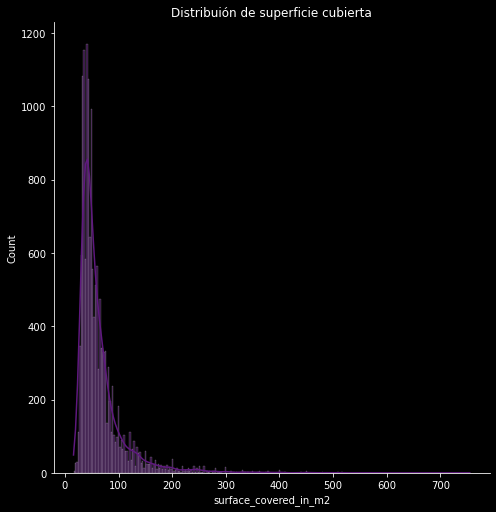

In [352]:
sns.displot(data[mask]['surface_covered_in_m2'], kde=True, color=sns.color_palette('magma')[1], height=7);
plt.title('Distribuión de superficie cubierta');

In [353]:
data = data[mask]

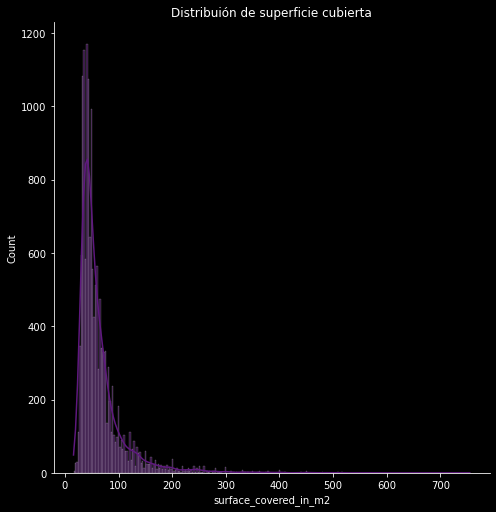

In [354]:
sns.displot(data.surface_covered_in_m2, kde=True, color=sns.color_palette('magma')[1], height=7);
plt.title('Distribuión de superficie cubierta');

In [355]:
data.describe()

,id_propiedad,price,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd,price_usd_per_m2,cochera,amenities,a estrenar,dist_subte_km_prom_barrio
count,15242.000000,1.524200e+04,15242.000000,15242.000000,1.524200e+04,15242.000000,15242.000000,15242.000000,15242.000000,15242.000000
mean,11915.853366,1.668684e+05,73.504396,65.135743,1.718219e+05,2476.068858,0.349429,0.396011,0.112912,0.868795
std,7103.972140,1.234444e+05,56.220640,47.600258,1.206922e+05,738.759641,0.476805,0.489083,0.316495,0.954676
min,1.000000,3.114100e+03,16.000000,16.000000,3.420000e+04,600.000000,0.000000,0.000000,0.000000,0.001555
25%,5915.250000,1.000000e+05,43.000000,39.000000,1.040000e+05,2013.224126,0.000000,0.000000,0.000000,0.323208
50%,11383.500000,1.340000e+05,56.000000,50.000000,1.350000e+05,2428.571429,0.000000,0.000000,0.000000,0.570265
75%,17871.250000,1.900000e+05,81.000000,72.000000,1.930698e+05,2878.787879,1.000000,1.000000,0.000000,0.933361
max,25413.000000,1.750000e+06,765.000000,755.000000,1.750000e+06,12053.571429,1.000000,1.000000,1.000000,6.990312


In [356]:
data.currency.value_counts()

USD    15242
Name: currency, dtype: int64

Efectivamente, así que la dropeamos.

In [357]:
data = data.drop(['currency'], axis=1)

In [358]:
data.rooms.value_counts()

1.0          3404
2.0          3271
3.0          2825
4.0          1193
1             859
             ... 
PULMÓN2º        1
ENTRADA         1
Monitoreo       1
puede           1
Amplios         1
Name: rooms, Length: 328, dtype: int64

Bueno, la limpieza nunca termina. Vamos a corregir estos datos antes de comenzar con la implementación de los modelos.

In [359]:
data.rooms = data.rooms.str.replace('.', '').str.lower()

In [360]:
import re
pattern = '(\D+)'
regex = re.compile(pattern, re.IGNORECASE)

matches = data.rooms.apply(lambda x: x if x is np.NaN else regex.search(x))
data[matches.notnull()]

,id_propiedad,property_type,place_name,price,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd,price_usd_per_m2,rooms,cochera,amenities,a estrenar,dist_subte_km_prom_barrio
23,27,store,Congreso,295000.0,103.0,103.0,295000.0,2864.077670,vigente,0,0,0,0.209040
26,33,store,Chacarita,175000.0,80.0,80.0,175000.0,2187.500000,puede,0,0,0,0.223862
59,93,house,Floresta,280000.0,200.0,100.0,280000.0,1400.000000,los,1,1,0,2.137349
62,97,apartment,Flores,120000.0,120.0,50.0,120000.0,1000.000000,dos,0,0,1,1.255791
67,104,store,San Telmo,164000.0,75.0,75.0,164000.0,2186.666667,muy,1,0,1,0.849245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15250,25396,apartment,Belgrano,359000.0,94.0,94.0,359000.0,3819.148936,posee,1,0,0,1.006633
15253,25402,apartment,Palermo,350000.0,95.0,87.0,350000.0,3684.210526,tres,1,0,0,0.584897
15256,25405,apartment,Flores,120000.0,72.0,72.0,120000.0,1666.666667,dos,0,0,0,0.269247
15257,25407,apartment,Barrio Norte,165000.0,91.0,65.0,165000.0,1813.186813,un,0,1,0,0.138645


In [361]:
data.rooms = data.rooms.str.replace('dos', '2')

In [362]:
data.rooms = data.rooms.str.replace('tres', '3')

In [363]:
data.rooms = data.rooms.str.replace('cuatro', '4')

In [364]:
data.rooms = data.rooms.str.replace('un', '1')

In [365]:
data.rooms = data.rooms.str.replace('cinco', '5')

In [366]:
data.rooms = data.rooms.str.replace('ocho', '8')

In [367]:
matches = data.rooms.apply(lambda x: x if x is np.NaN else regex.search(x))
data[matches.notnull()]

,id_propiedad,property_type,place_name,price,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd,price_usd_per_m2,rooms,cochera,amenities,a estrenar,dist_subte_km_prom_barrio
23,27,store,Congreso,295000.0,103.0,103.0,295000.0,2864.077670,vigente,0,0,0,0.209040
26,33,store,Chacarita,175000.0,80.0,80.0,175000.0,2187.500000,puede,0,0,0,0.223862
59,93,house,Floresta,280000.0,200.0,100.0,280000.0,1400.000000,los,1,1,0,2.137349
67,104,store,San Telmo,164000.0,75.0,75.0,164000.0,2186.666667,muy,1,0,1,0.849245
68,105,store,San Telmo,210000.0,79.0,79.0,210000.0,2658.227848,muy,1,0,1,0.627989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15173,24889,store,Caballito,400000.0,379.0,379.0,400000.0,1055.408971,local,0,0,0,0.171085
15234,24989,apartment,Barrio Norte,420000.0,143.0,135.0,420000.0,2937.062937,y,1,0,0,0.471892
15242,25383,store,Barracas,355000.0,169.0,169.0,355000.0,2100.591716,montes,1,0,0,1.412087
15250,25396,apartment,Belgrano,359000.0,94.0,94.0,359000.0,3819.148936,posee,1,0,0,1.006633


In [368]:
data = data[matches.isnull()]

In [369]:
data.shape

(13466, 13)

In [370]:
data.rooms.value_counts()

10      3404
20      3271
30      2825
40      1193
1        972
2        575
00       342
3        317
50       271
0        105
4         66
60        62
70        26
5         11
100        4
80         4
90         2
6          2
8          2
130        2
5010       2
323        1
7          1
65         1
15         1
200        1
430        1
7710       1
110        1
Name: rooms, dtype: int64

Tenemos muchos datos con cuartos que parecen anormales, vamos a quedarnos con el primer dígito de cada uno por una cuestión de tiempo.

In [371]:
data.rooms = data.rooms.str.split('').str.get(1)

In [372]:
data.rooms = data.rooms.astype(int)

In [373]:
data.rooms.dtype

dtype('int32')

In [374]:
data.shape

(13466, 13)

In [375]:
data.rooms.value_counts()

1    4384
2    3847
3    3143
4    1260
0     447
5     284
6      65
7      28
8       6
9       2
Name: rooms, dtype: int64

In [376]:
data.rooms.describe()

count    13466.000000
mean         2.125278
std          1.180157
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

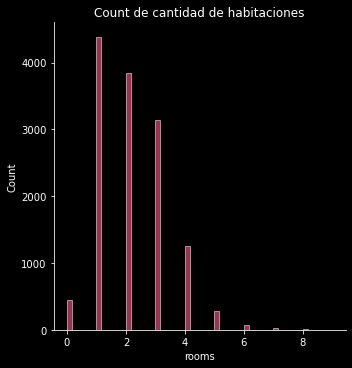

In [377]:
sns.displot(data.rooms, color=sns.color_palette('magma')[3]);
plt.title('Count de cantidad de habitaciones');

Ahora que terminamos un poco de limpieza que nos había quedado colgada, queremos explorar la correlación entre las variables y ver cómo se distribuyen las variables numéricas que tenemo porque vamos a usar esas variabls para construir los primeros modelos para usar de baseline.

In [378]:
data = data.reset_index()

In [379]:
def matrix_corr(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
matrix_corr(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
3,price,price_aprox_usd,0.971073,0.971073
21,price_aprox_usd,price,0.971073,0.971073
15,surface_covered_in_m2,surface_total_in_m2,0.947691,0.947691
9,surface_total_in_m2,surface_covered_in_m2,0.947691,0.947691
23,price_aprox_usd,surface_covered_in_m2,0.778883,0.778883
17,surface_covered_in_m2,price_aprox_usd,0.778883,0.778883
2,price,surface_covered_in_m2,0.765991,0.765991
14,surface_covered_in_m2,price,0.765991,0.765991
22,price_aprox_usd,surface_total_in_m2,0.747363,0.747363
10,surface_total_in_m2,price_aprox_usd,0.747363,0.747363


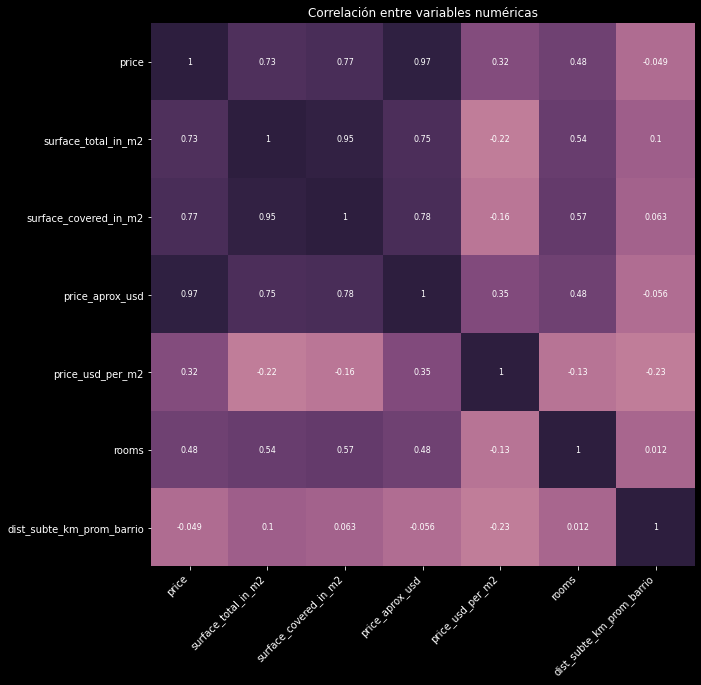

In [380]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.cubehelix_palette(as_cmap=True),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.set_title("Correlación entre variables numéricas")
ax.tick_params(labelsize = 10)

Se ve muy picante la correlación, tenemos un problema de colinealidad y no tenemos un predictor que se relacione claramente con la variable target.

La correlación entre las dos variables de superficie va a ser problemática pero vamos a dejar que ese problema se exprese y a solucionarlo cuando apararezca.

Queremos ver también cómo se distribuyen nuestras variables numéricas para ver cómo resultó el trabajo de la note anterior.

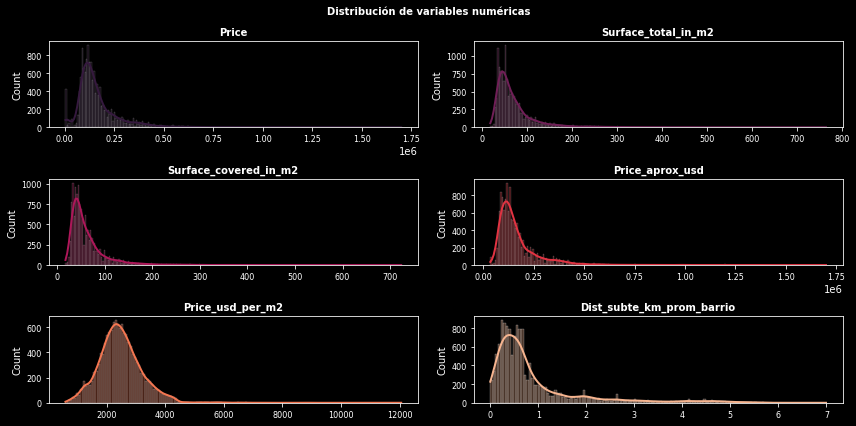

In [381]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
axes = axes.flat
columnas_numeric = data.drop(['rooms'], axis=1).select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = sns.color_palette('rocket')[i],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum.capitalize(), fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables numéricas', fontsize = 10, fontweight = "bold");

Las distribuciones se ven bien pero son exponenciales y para poder fitear el modelo necesitamos que las variables estén distribuídas de forma normal así que vamos a hacer una transformación logarítmica para normalizarlas porque nos gustaría ir agregando variables de a una para ver el efecto que producen.

Primero vamos a eliminar las variables de precio y precio aprox porque no nos sirven para usar como predictoras y plotear la relación que tienen nuestras predictoras con la target con un regplot.

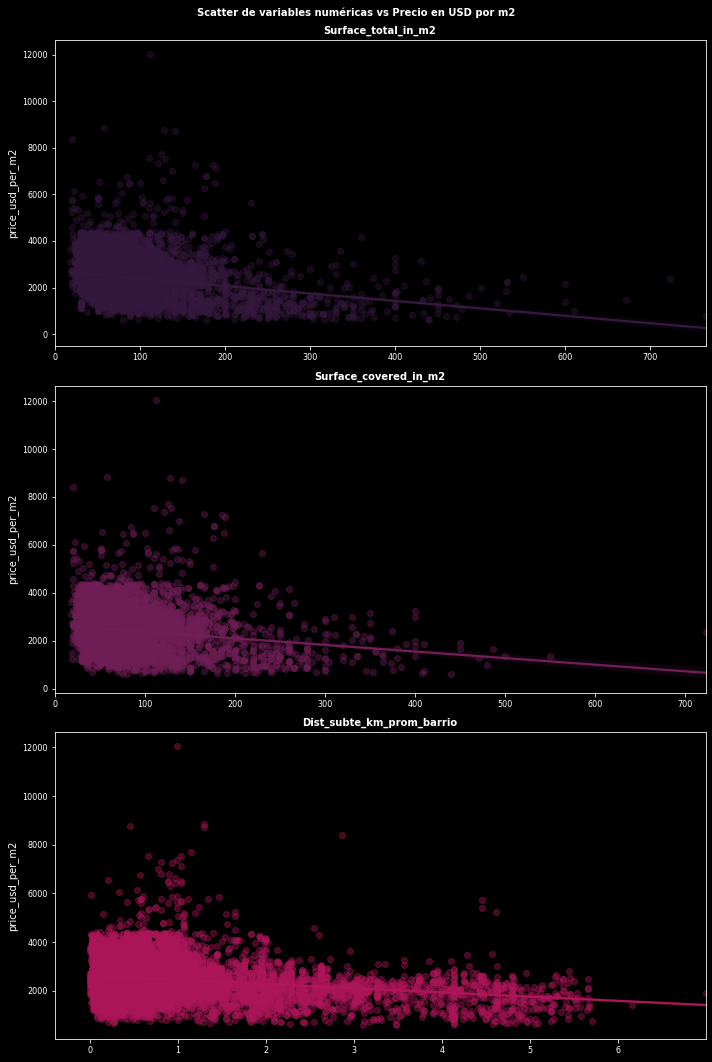

In [382]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
axes = axes.flat
columnas_numeric = data.drop(['rooms', 'price_usd_per_m2', 'price', 'price_aprox_usd'], axis=1).select_dtypes(include=['float64', 'int']).columns
alpha = 0.6

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        data    = data,
        x       = colum,
        y       = data['price_usd_per_m2'],
        color   = sns.color_palette('rocket')[i],
        ax      = axes[i],
        scatter_kws={'alpha': 0.4}
    )
    axes[i].set_title(colum.capitalize(), fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_xlim(-.4)

    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Scatter de variables numéricas vs Precio en USD por m2', fontsize = 10, fontweight = "bold");

Ya sabíamos esto a partir del heatmap, pero acá vemos con claridad nuevamente que la relación entre nuestras variables numéricas y nuestra variable target es bastante tenue.

Ahora dropeamos las variables que no vamos usar y hacemos la transformación logarítmica de las que sí.

In [383]:
data = data.drop(['price', 'price_aprox_usd'], axis=1)

In [384]:
data['surface_total_log'] = np.log(data['surface_total_in_m2'])

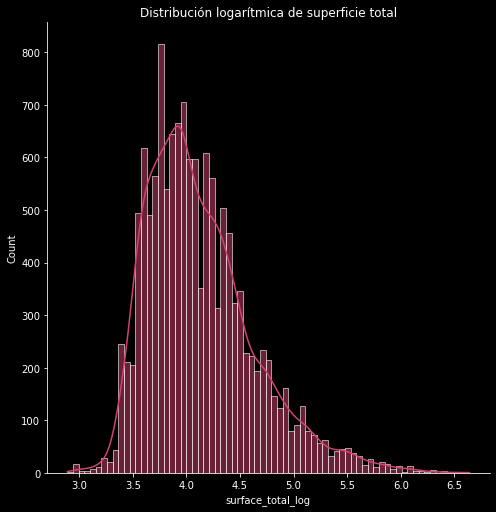

In [385]:
sns.displot(data['surface_total_log'], kde=True, color=sns.color_palette('magma')[3], height=7);
plt.title('Distribución logarítmica de superficie total');

Así se ve un poco mejor, vamos ahacer lo mismo para superficie cubierta, distancia al subte y precio en dólares por m2.

In [386]:
data['surface_cubierta_log'] = np.log(data['surface_covered_in_m2'])

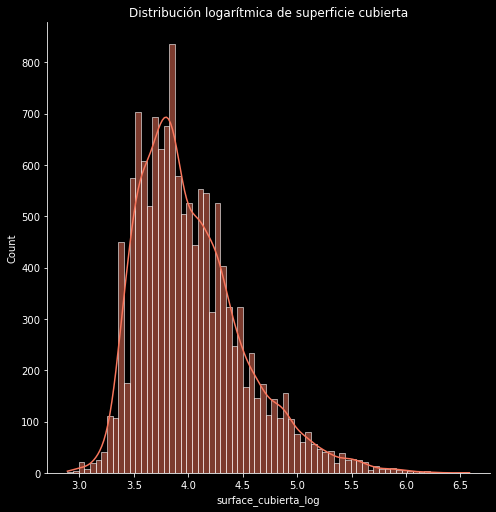

In [387]:
sns.displot(data['surface_cubierta_log'], kde=True, color=sns.color_palette('magma')[4], height=7);
plt.title('Distribución logarítmica de superficie cubierta');

In [388]:
data['price_usd_log'] = np.log(data['price_usd_per_m2'])

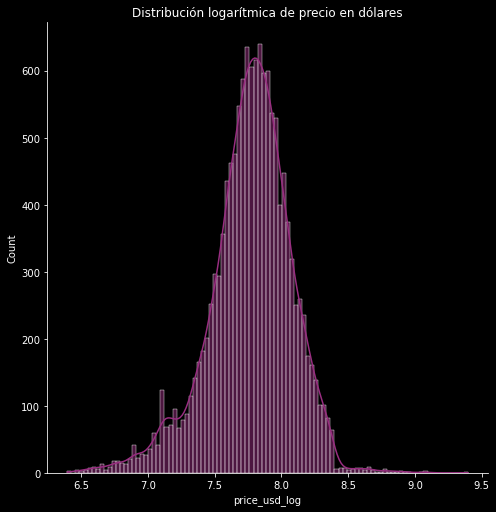

In [389]:
sns.displot(data['price_usd_log'], kde=True, color=sns.color_palette('magma')[2], height=7);
plt.title('Distribución logarítmica de precio en dólares');

In [390]:
data['dist_log'] = np.log(data['dist_subte_km_prom_barrio'])

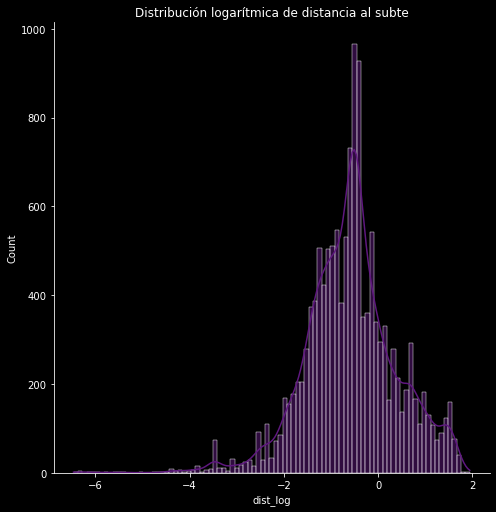

In [391]:
sns.displot(data['dist_log'], kde=True, color=sns.color_palette('magma')[1], height=7);
plt.title('Distribución logarítmica de distancia al subte');

Vamos a probar instanciar un primer modelo usando las superficies, la distancia al subte y la cantidad de habiltaciones antes de probar la versión con las variables transformadas.

Ya importamos el tipo de modelo, vamos a separar nuestros datos en predictores y target.

In [392]:
X = data[['surface_total_in_m2', 'surface_covered_in_m2', 'dist_subte_km_prom_barrio', 'rooms']]
y = data['price_usd_per_m2']

Ahora generamos el set de entrenamiento y el de testeo:

In [393]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

E implementamos el modelo sobre el set de train.

In [394]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     366.0
Date:                Thu, 06 May 2021   Prob (F-statistic):          5.15e-296
Time:                        09:47:57   Log-Likelihood:                -85607.
No. Observations:               10772   AIC:                         1.712e+05
Df Residuals:                   10767   BIC:                         1.713e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Ahora probemos una versión igual pero usando las variables con la transformación logarítimica.

In [395]:
X = data[['surface_total_log', 'surface_cubierta_log', 'dist_log', 'rooms']]
y = data['price_usd_log']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     422.5
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:57   Log-Likelihood:                -1799.3
No. Observations:               10772   AIC:                             3609.
Df Residuals:                   10767   BIC:                             3645.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.3302 

Esta versión del modelo es un poco mejor. 

Tenemos a grandes rasgos dos problemas:

1 - La alta correlación entre nuestros predictores.

2 - La baja correlación entre cualquiera de ellos y nuestra variable target.

3 - Vamos a probar agregando algunas variables dummies, empezando por tipo de propiedad.

In [396]:
property_dummies = pd.get_dummies(data.property_type, prefix='prop')
property_dummies.sample(n=5, random_state=1)

,prop_apartment,prop_house,prop_ph,prop_store
8371,1,0,0,0
10709,0,0,1,0
12479,1,0,0,0
7617,1,0,0,0
12795,1,0,0,0


In [397]:
property_dummies.drop(property_dummies.columns[0], axis=1, inplace=True)
property_dummies.sample(n=5, random_state=1)

,prop_house,prop_ph,prop_store
8371,0,0,0
10709,0,1,0
12479,0,0,0
7617,0,0,0
12795,0,0,0


In [398]:
data = pd.concat([data, property_dummies], axis=1)
data.sample(n=5)

,index,id_propiedad,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,cochera,amenities,a estrenar,dist_subte_km_prom_barrio,surface_total_log,surface_cubierta_log,price_usd_log,dist_log,prop_house,prop_ph,prop_store
12050,13723,22273,ph,San Telmo,180.0,120.0,1083.333333,3,0,0,0,0.586033,5.192957,4.787492,6.987798,-0.534379,0,1,0
6084,6344,9558,apartment,Barrio Norte,91.0,81.0,2142.857143,3,0,0,0,0.077449,4.510860,4.394449,7.669895,-2.558141,0,0,0
3423,3569,5552,apartment,Recoleta,54.0,50.0,2870.370370,2,0,0,0,0.198992,3.988984,3.912023,7.962196,-1.614489,0,0,0
12070,13743,22299,apartment,Caballito,43.0,43.0,2558.139535,1,0,1,0,0.323420,3.761200,3.761200,7.847036,-1.128803,0,0,0
1040,1076,1741,apartment,Balvanera,55.0,55.0,2090.909091,3,0,0,0,0.399189,4.007333,4.007333,7.645354,-0.918320,0,0,0


In [399]:
data = data.reset_index()

In [400]:
X = data[['surface_total_in_m2', 'surface_covered_in_m2', 'dist_subte_km_prom_barrio', 'prop_house', 'prop_ph', 'prop_store']]
y = data['price_usd_per_m2']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1, 1),
                                        train_size = 0.8,
                                        random_state = 1234,
                                        shuffle = True
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog = y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     325.4
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:57   Log-Likelihood:                -85396.
No. Observations:               10772   AIC:                         1.708e+05
Df Residuals:                   10765   BIC:                         1.709e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Acá se vuelve evidente el problema de multicolinealidad, vamos a probar con las versiones logarítimicas de las variables.

In [401]:
X = data[['surface_total_log', 'surface_cubierta_log', 'dist_log', 'rooms', 'prop_house', 'prop_ph', 'prop_store']]
y = data['price_usd_log']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     410.7
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:57   Log-Likelihood:                -1309.6
No. Observations:               10772   AIC:                             2635.
Df Residuals:                   10764   BIC:                             2693.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.9292 

Agregar el tipo de propiedad aumenta el r2 muy poquito, sus coeficientes son significativos pero podrían serlo más porque hay un problema de multicolinealidad, para ver qué nivel de problema de colinealidad tenemos vamos a a analizar qué variables están driveando la multicolinealidad con VIF y ver qué podemos hacer.

El VIF lo que hace es un ratio entre la varianza de todos los betas de un modelo por la varianza de un solo beta si fuera fiteado por separado.

Por lo tanto, valores altos de VIF indican mucho riesgo de multicolinealidad.

In [402]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data[['surface_total_in_m2', 'surface_covered_in_m2', 'dist_subte_km_prom_barrio', 'surface_total_log', 'surface_cubierta_log', 'dist_log', 'amenities', 'cochera', 'a estrenar', 'prop_house', 'prop_store', 'prop_ph']]

def vif(X):
    vif_df = pd.DataFrame() 
    vif_df["feature"] = X.columns 
  
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) 
                              for i in range(len(X.columns))]
    return vif_df

In [403]:
vif(X)

,feature,VIF
0,surface_total_in_m2,101.910545
1,surface_covered_in_m2,102.335696
2,dist_subte_km_prom_barrio,5.752362
3,surface_total_log,2599.908543
4,surface_cubierta_log,2620.789581
5,dist_log,4.140594
6,amenities,1.887144
7,cochera,1.752866
8,a estrenar,1.186933
9,prop_house,2.060771


Acá parecería indispensable que hagamos algo respecto de las dos variables de superficie, se me ocurren 3 cosas:

1 - probar dropeando los datos de superficie de los predictores. 

2 - convertir las variables a puntajes Z.

3 - combinar los datos de las dos variables con un PCA.

Vamos a hacer una versión del modelo en la que no incluyamos la superficie cubierta para ver cómo rinde.

In [404]:
X = data[['surface_total_log', 'dist_log', 'rooms', 'prop_house', 'prop_ph', 'prop_store']]
y = data['price_usd_log']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     429.7
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:58   Log-Likelihood:                -1428.1
No. Observations:               10772   AIC:                             2870.
Df Residuals:                   10765   BIC:                             2921.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0611      0.03

Nos bajó un poco el r2, estaría bien probar estandarizando nuestros valores y estaría bueno también combinar los dos tipos de superficie para ver si podemos capturar algo de variabilidad que con una sola de las dos no estamos agarrando.

Voy a hacer un PCA para combinarlas porque puede ser que hubiera algo en la variable de superficie cubierta que esté aportando algo al modelo que nos estamos perdiendo aunque sea muy chico el efecto.

Primero voy a estandarizar las superficies.

In [405]:
# primero estandarizo
from sklearn.preprocessing import StandardScaler
X = data[['surface_total_log', 'surface_cubierta_log', 'surface_total_in_m2', 'surface_covered_in_m2']]
X = StandardScaler().fit_transform(X)

In [406]:
# ahora reduzo las dos superficies a un solo componente
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['superficie_log_PCA', 'superficie_PCA'])

In [407]:
principalDf

,superficie_log_PCA,superficie_PCA
0,-0.404328,-0.154940
1,-1.207007,0.122752
2,0.007512,-0.241741
3,-1.469435,0.307678
4,-1.674624,0.348123
...,...,...
13461,-0.582528,-0.104731
13462,0.506828,-0.341672
13463,0.735298,-0.294776
13464,-1.277037,0.150288


In [408]:
principalDf.isna().mean()

superficie_log_PCA    0.0
superficie_PCA        0.0
dtype: float64

In [409]:
data.isna().mean()

level_0                      0.0
index                        0.0
id_propiedad                 0.0
property_type                0.0
place_name                   0.0
surface_total_in_m2          0.0
surface_covered_in_m2        0.0
price_usd_per_m2             0.0
rooms                        0.0
cochera                      0.0
amenities                    0.0
a estrenar                   0.0
dist_subte_km_prom_barrio    0.0
surface_total_log            0.0
surface_cubierta_log         0.0
price_usd_log                0.0
dist_log                     0.0
prop_house                   0.0
prop_ph                      0.0
prop_store                   0.0
dtype: float64

In [410]:
PCA = principalDf[['superficie_log_PCA', 'superficie_PCA']]
PCA

,superficie_log_PCA,superficie_PCA
0,-0.404328,-0.154940
1,-1.207007,0.122752
2,0.007512,-0.241741
3,-1.469435,0.307678
4,-1.674624,0.348123
...,...,...
13461,-0.582528,-0.104731
13462,0.506828,-0.341672
13463,0.735298,-0.294776
13464,-1.277037,0.150288


In [411]:
data_PCA = pd.concat([data, PCA], axis=1)

In [412]:
data_PCA = data_PCA.drop(['level_0', 'index'], axis=1)

In [413]:
data_PCA.isna().mean()

id_propiedad                 0.0
property_type                0.0
place_name                   0.0
surface_total_in_m2          0.0
surface_covered_in_m2        0.0
price_usd_per_m2             0.0
rooms                        0.0
cochera                      0.0
amenities                    0.0
a estrenar                   0.0
dist_subte_km_prom_barrio    0.0
surface_total_log            0.0
surface_cubierta_log         0.0
price_usd_log                0.0
dist_log                     0.0
prop_house                   0.0
prop_ph                      0.0
prop_store                   0.0
superficie_log_PCA           0.0
superficie_PCA               0.0
dtype: float64

In [414]:
data_PCA.columns

Index(['id_propiedad', 'property_type', 'place_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'cochera',
       'amenities', 'a estrenar', 'dist_subte_km_prom_barrio',
       'surface_total_log', 'surface_cubierta_log', 'price_usd_log',
       'dist_log', 'prop_house', 'prop_ph', 'prop_store', 'superficie_log_PCA',
       'superficie_PCA'],
      dtype='object')

In [415]:
X = data_PCA[['superficie_log_PCA', 'superficie_PCA', 'dist_log', 'prop_house', 'rooms', 'prop_ph', 'prop_store']]
y = data_PCA['price_usd_per_m2']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1, 1),
                                        train_size = 0.8,
                                        random_state = 1234,
                                        shuffle = True
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog = y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     224.7
Date:                Thu, 06 May 2021   Prob (F-statistic):          6.12e-313
Time:                        09:47:58   Log-Likelihood:                -85559.
No. Observations:               10772   AIC:                         1.711e+05
Df Residuals:                   10764   BIC:                         1.712e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2595.1320     19

Bueno, el PCA no da significativo y el r2 nos da más bajo que usando simplemente la superficie transformada.

Vamos a seguir usando el dataset sin el PCA.

Nos vamos a quedar con las variables logarítmicas y vamos a incorporar amenities y cochera al modelo.

In [416]:
X = data[['surface_total_log', 'dist_log', 'rooms', 'prop_house', 'prop_ph', 'prop_store', 'amenities', 'cochera']]
y = data['price_usd_log']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1, 1),
                                        train_size = 0.8,
                                        random_state = 1234,
                                        shuffle = True
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog = y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     440.8
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:58   Log-Likelihood:                -1058.0
No. Observations:               10772   AIC:                             2134.
Df Residuals:                   10763   BIC:                             2200.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0441      0.03

Ahora lo que vamos a hacer es generar las dummies de barrio y agregarlas al modelo.

In [417]:
barrio_dummies = pd.get_dummies(data.place_name, prefix='barrio')
barrio_dummies.sample(n=5, random_state=1)

,barrio_Abasto,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,barrio_Belgrano,barrio_Boca,barrio_Boedo,barrio_Caballito,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
8371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [418]:
barrio_dummies.drop(barrio_dummies.columns[0], axis=1, inplace=True)
barrio_dummies.sample(n=5, random_state=1)

,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,barrio_Belgrano,barrio_Boca,barrio_Boedo,barrio_Caballito,barrio_Centro / Microcentro,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
8371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [419]:
data = pd.concat([data, barrio_dummies], axis=1)
data.sample(n=5)

,level_0,index,id_propiedad,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,cochera,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
12266,12266,13942,22576,apartment,Palermo,43.0,43.0,3018.604651,2,1,...,0,0,0,0,0,0,0,0,0,0
10660,10660,11839,18662,apartment,Parque Patricios,56.0,47.0,2193.125000,3,1,...,0,0,0,0,0,0,0,0,0,0
2161,2161,2255,3456,ph,Mataderos,100.0,57.0,1180.000000,3,0,...,0,0,0,0,0,0,0,0,0,0
9187,9187,9842,15036,apartment,Caballito,103.0,73.0,2038.834951,1,1,...,0,0,0,0,0,0,0,0,0,0
7850,7850,8186,12145,apartment,Barracas,42.0,38.0,3333.333333,2,1,...,0,0,0,0,0,0,0,0,0,0


In [420]:
data = data.drop(['level_0', 'index'], axis=1)

In [421]:
X = data.drop(['id_propiedad', 
               'property_type', 
               'place_name', 
               'surface_total_in_m2', 
               'surface_covered_in_m2', 
               'dist_subte_km_prom_barrio', 
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)
y = data['price_usd_log']

In [422]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1, 1),
                                        train_size = 0.8,
                                        random_state = 1234,
                                        shuffle = True
                                    )

In [423]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog = y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     291.8
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:58   Log-Likelihood:                 3115.5
No. Observations:               10772   AIC:                            -6091.
Df Residuals:                   10702   BIC:                            -5581.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

El r2 subió bastante y no tenemos la advertencia de multicolinealidad, pero tenemos p valores para algunas variables que distan bastante de la significatividad.

Vamos a agregar una variable patio tomada de si la superficie total es mayor que la cubierta, agregar unas variables de superficie al cuadrado y al cubo y correr un modelo con todos los features que pusimos hasta ahora.

In [424]:
data['surface_X_suface'] = data['surface_total_in_m2']*data['surface_total_in_m2']

In [425]:
data['covered_X_surface'] = data['surface_covered_in_m2']*data['surface_covered_in_m2']

In [426]:
data['surface_log_X'] = data['surface_total_log']*data['surface_total_log']

In [427]:
data['covered_log_X'] = data['surface_cubierta_log']*data['surface_cubierta_log']

In [428]:
data[['superficie_PCA', 'superficie_log_PCA']] = data_PCA[['superficie_PCA', 'superficie_log_PCA']]

In [429]:
data['surface_PCA_X'] = data['superficie_PCA']*data['superficie_PCA']

In [430]:
patio = data['surface_total_in_m2'] - data['surface_covered_in_m2']

In [431]:
data['patio'] = patio.apply(lambda x: 1 if x != 0 else 0)

In [432]:
data['surface_log_CUBE'] = data['surface_log_X']*data['surface_total_log']

In [433]:
data['covered_log_CUBE'] = data['covered_log_X']*data['surface_cubierta_log']

In [434]:
data['surface_PCA_CUBE'] = data['surface_PCA_X']*data['superficie_log_PCA']

In [435]:
X = data.drop(['id_propiedad', 
               'property_type', 
               'place_name',
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)
y = data['price_usd_log']

In [436]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1, 1),
                                        train_size = 0.8,
                                        random_state = 1234,
                                        shuffle = True
                                    )

In [437]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog = y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     262.9
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:59   Log-Likelihood:                 3318.8
No. Observations:               10772   AIC:                            -6474.
Df Residuals:                   10690   BIC:                            -5876.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Acá al final nos volvimos un poco locos y probamos agregando features a diestra y siniestra. 
Vamos a probar los modelos de regularización a ver cómo nos va. Sería verdaderamente muy raro que el rendimiento del modelo mejore porque estamos muy lejos de tener un modelo overfiteado.

### Ridge:

Primero corrimos un modelo usando el argumento normalize de RidgeCV, es decir, sin StandardScaler(), con un split de 80/20 y usando Leave-One-Out Cross Validation, que entendemos es una modo de dejar una sola observación como "test" set y tratar de predecir el valor de dicha observación con todas las demás, calculando el MSE y volviendo a hacer lo mismo para todas las observaciones. De esta manera obtenemos un promedio del MSE que obtuvimos al tratar de predecir todas las observaciones de nuestro train set.

Usamos esto porque justamene leyendo la documentación de RidgeCV vimos que tiene un argumento llamado store_cv_values que hace esto que no está presente en los demás modelos y nos parecía interesante probarlo. No encontramos mucha info sobre si esto es conveniente en todos los casos pero sabemos que tiene una desventaja clara que es que toma un poco más de tiempo computacionalmente pero también una ventaja notoria, que es que nos da una estimación menos susceptible al sesgo.

In [438]:
X = data.drop(['id_propiedad', 
               'property_type', 
               'place_name',
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)
y = data['price_usd_log']

In [439]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y.values.reshape(-1, 1),
                                                    train_size = 0.8,
                                                    random_state = 1234,
                                                    shuffle = True
                                                    )

cv_ridge_1 = RidgeCV(
                    alphas = np.logspace(-10, 2, 200),
                    fit_intercept = True,
                    normalize = True,
                    store_cv_values = True
                    )

fit_ridge_1 = cv_ridge_1.fit(X = X_train, y = y_train)

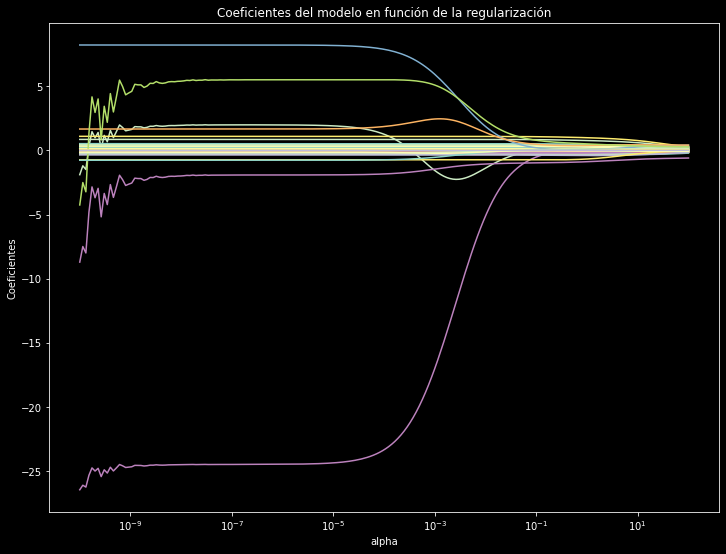

In [440]:
alphas = fit_ridge_1.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

Pusimos muchos aphas y se ve claramente que a medida que el alpha aumenta, nuestros coeficientes se achican cada vez más pero sin llegar nunca a 0.

In [441]:
print(f'Mejor valor de alpha: {fit_ridge_1.alpha_}')
print(f'R2: {fit_ridge_1.score(X_train, y_train)}')

Mejor valor de alpha: 0.009115888299750819
R2: 0.6614676441770981


In [442]:
r2_test_ridge_1 = fit_ridge_1.score(X_test, y_test)
r2_test_ridge_1

0.6707113694623663

Y ahora probamos una versión igual pero usando el StandardScaler() solo para probar la diferencia entre estandarizar y normalizar.

In [443]:
X = data.drop(['id_propiedad', 
               'property_type', 
               'place_name',
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)
y = data['price_usd_log']

In [444]:
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
                                                    X_std, 
                                                    y.values.reshape(-1, 1), 
                                                    train_size = 0.8, 
                                                    random_state = 1234
                                                    )

cv_ridge_2 = RidgeCV(alphas = np.logspace(-10, 2, 200), 
                                      fit_intercept = True, 
                                      normalize = False, 
                                      store_cv_values = True)

fit_ridge_2 = cv_ridge_2.fit(X_train, y_train)

In [445]:
print(f'Mejor valor de alpha: {fit_ridge_2.alpha_}')
print(f'R2: {fit_ridge_2.score(X_train, y_train)}')

Mejor valor de alpha: 100.0
R2: 0.6614672574561209


In [446]:
r2_test_ridge_2 = fit_ridge_2.score(X_test, y_test)
r2_test_ridge_2

0.6707348812428914

Vemos que los r2 son iguales para ambos modelos pero cambia la escala del alpha, vamos a calcular el rmse usando el primer modelo (que usaba el normalize=True) porque esa es la metodología que queremos implementar para los demás y queremos poder comparar los rmse de cada modelo en la misma unidad.

In [447]:
predict_ridge = cv_ridge_1.predict(X=X_test)
predict_ridge = predict_ridge.flatten()

In [448]:
rmse_ridge = mean_squared_error(
                y_true = y_test,
                y_pred = predict_ridge,
                squared = False
               )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 2.0596028833742266


Nuestras predicciones con el modelo ridge se alejan en promedio un 2.05 unidades del valor real.

### Lasso

Ahora probamos una versión del modelo usando regularización Lasso.

In [449]:
X = data.drop(['id_propiedad', 
               'property_type', 
               'place_name',
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)
y = data['price_usd_log']

In [450]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y.values.reshape(-1,),
                                                    train_size = 0.8,
                                                    random_state = 1234,
                                                    shuffle = True
                                                    )

In [451]:
cv_lasso = LassoCV(
            alphas = np.logspace(-10, 3, 200),
            normalize = True,
            cv = 10
         )

fit_lasso = cv_lasso.fit(X_train, y_train)

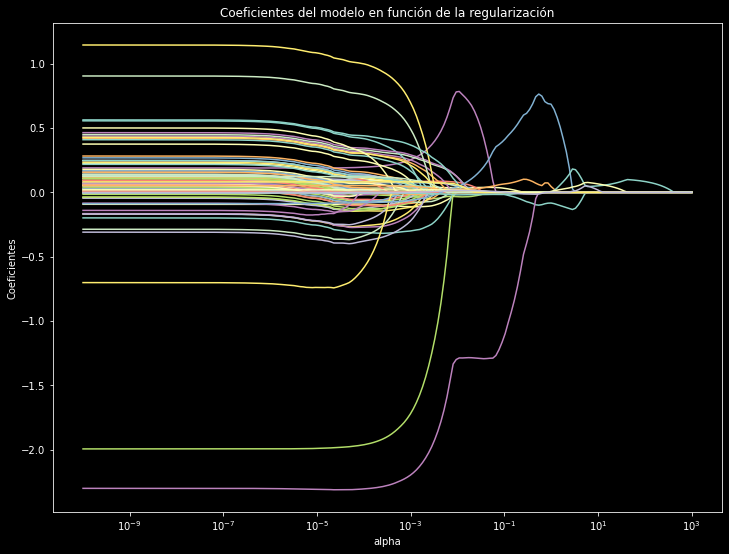

In [452]:
alphas = fit_lasso.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

Acá se ve con claridad cómo algunos de los coeficientes son llevados a 0 por el modelo.

In [453]:
print(f'Mejor valor de alpha: {fit_lasso.alpha_}')
print(f'R2: {fit_lasso.score(X_train, y_train)}')

Mejor valor de alpha: 9.221978823334342e-06
R2: 0.6598258770362528


In [454]:
r2_test_lasso = fit_lasso.score(X_test, y_test)
r2_test_lasso

0.669025430581419

In [455]:
predict_lasso = cv_lasso.predict(X=X_test)
predict_lasso = predict_lasso.flatten()

In [456]:
rmse_lasso = mean_squared_error(
                y_true = y_test,
                y_pred = predict_lasso,
                squared = False
               )

print(f"El error (rmse) de test es: {rmse_lasso}")

El error (rmse) de test es: 0.1804086123132357


Con el modelo Lasso, nuestras predicciones se alejan un 0.18 unidades del valor real y el r2 de test es casi igual al modelo de Ridge.

### Elastic Net

Por último, fiteamos un Elastic Net.

Probamos distintos ratios de l1 (alphas) para ver cuál se ajuta mejor. Como vimos, elastic net es una combinación de los dos modelos anteriores y la manera en la que combina los métodos de regularización l1 y l2 es un ratio. 

En la documentación de sklearn.linear_model.ElasticNet vemos que la forma en la que se usa este argumento es 0 <= l1_ratio <= 1. 

Para un l1_ratio = 0, la penalización es igual a la de Ridge. 

Para l1_ratio = 1 es igual a la de Lasso. 

Para 0 < l1_ratio < 1, la penalización es una combinación entre las dos.

In [457]:
X = data.drop(['id_propiedad', 
               'property_type', 
               'place_name',
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)
y = data['price_usd_log']

In [458]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y.values.reshape(-1,),
                                                    train_size = 0.8,
                                                    random_state = 1234,
                                                    shuffle = True
                                                    )

In [459]:
cv_EN = ElasticNetCV(
            l1_ratio = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas = np.logspace(-10, 3, 200),
            normalize = True,
            cv = 10
         )

fit_EN = cv_EN.fit(X = X_train, y = y_train)

In [460]:
print(f'Mejor valor de alpha: {fit_EN.alpha_}')
print(f'R2: {fit_EN.score(X_train, y_train)}')

Mejor valor de alpha: 7.934096665797492e-06
R2: 0.660105698097684


In [461]:
r2_test_EN = fit_EN.score(X_test, y_test)
r2_test_EN

0.6694429208362418

In [462]:
predict_EN = cv_EN.predict(X=X_test)
predict_EN = predict_EN.flatten()

In [463]:
rmse_EN = mean_squared_error(
                y_true = y_test,
                y_pred = predict_EN,
                squared = False
               )

print(f"El error (rmse) de test es: {rmse_EN}")

El error (rmse) de test es: 0.18029479298810455


Con el modelo de EN nuestras predicciones se alejan en promedio 0.18 unidades del valor real, igual que con el Lasso.

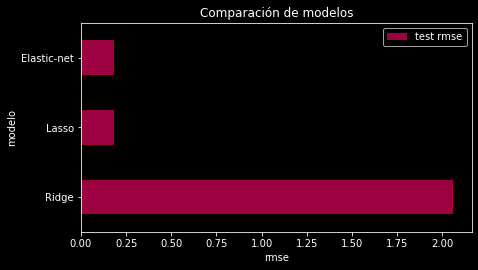

In [464]:
df_errores = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ridge, rmse_lasso, rmse_EN]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_errores.set_index('modelo').plot(kind='barh', ax=ax, colormap='Spectral')
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

En este caso, el error de Lasso y Elastic Net son mucho más chicos que el de Ridge, de hecho vamos a ver qué ratio terminó utilizando Elastic Net porque son muy similares los rmse.

In [465]:
fit_EN.l1_ratio_

0.99

Como habíamos visto más arriba, usa un ratio que es casi idéntico a una regresión Lasso.

### Portfolio

Ahora vamos a armar el porfolio con 100 observaciones al azar, para esto vamos a usar nuestro modelo regularizado con Lasso porque tiene lo que nos parece el mejor balance entre r2 y rmse, y que nuestro modelo de Elastic Net terminó usando un l1 ratio de .99.

In [466]:
X = data.drop(['id_propiedad', 
               'property_type', 
               'place_name',
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)
y = data['price_usd_per_m2']

In [467]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y.values.reshape(-1,),
                                                    train_size = 0.8,
                                                    random_state = 1234,
                                                    shuffle = True
                                                    )

In [468]:
cv_lasso = LassoCV(
            alphas = np.logspace(-10, 3, 200),
            normalize = True,
            cv = 10
         )

fit_lasso = cv_lasso.fit(X_train, y_train)

Elegimos una muestra aleatoria para nuestro protfolio.

In [469]:
portfolio = data.sample(100, random_state=1234)

In [470]:
X_portfolio = portfolio.drop(['id_propiedad', 
               'property_type', 
               'place_name',
               'price_usd_per_m2', 
               'price_usd_log'], axis=1)

In [471]:
pred = pd.Series(fit_lasso.predict(X_portfolio), name='pred')

In [472]:
pred

0     1903.012608
1     3226.316069
2     2496.350836
3     2860.141458
4     2563.432519
         ...     
95    1912.737999
96    2723.464153
97    2741.432664
98    1695.431672
99    2326.848790
Name: pred, Length: 100, dtype: float64

In [473]:
portfolio = pd.concat([portfolio.reset_index(), pred], axis=1)

In [474]:
portfolio[['price_usd_per_m2', 'pred']]

,price_usd_per_m2,pred
0,2000.000000,1903.012608
1,4175.192308,3226.316069
2,1628.205128,2496.350836
3,4375.000000,2860.141458
4,2437.500000,2563.432519
...,...,...
95,1988.636364,1912.737999
96,2222.222222,2723.464153
97,2548.780488,2741.432664
98,1409.090909,1695.431672


A partir de este portfolio, podemos identificar qué propiedades representan una oportunidad de compra de acuerdo a nuestro modelo y también podemos identificar qué propiedades se encuentran sobrevaluadas y probablemente tarden más en venderse de lo necesario.

In [475]:
oportunidades_de_compra = portfolio[portfolio['price_usd_per_m2'] < portfolio['pred']][['property_type', 'place_name', 'price_usd_per_m2', 'pred']]
oportunidades_de_compra.head(10)

,property_type,place_name,price_usd_per_m2,pred
2,apartment,Villa Urquiza,1628.205128,2496.350836
4,apartment,San Telmo,2437.500000,2563.432519
5,apartment,Flores,1966.829268,2314.204217
6,house,Flores,1214.953271,1701.331074
8,apartment,Almagro,2163.043478,2203.339937
12,apartment,Floresta,1397.727273,1622.459841
13,apartment,Balvanera,1460.784314,1595.734176
15,apartment,Flores,1816.326531,1975.329423
17,apartment,Recoleta,2748.348837,3287.311553
18,apartment,Almagro,2198.000000,2709.541534


In [476]:
sobrevaluados = portfolio[portfolio['price_usd_per_m2'] > portfolio['pred']][['property_type', 'place_name', 'price_usd_per_m2', 'pred']]
sobrevaluados.head(10)

,property_type,place_name,price_usd_per_m2,pred
0,apartment,Congreso,2000.000000,1903.012608
1,apartment,Recoleta,4175.192308,3226.316069
3,apartment,Barrio Norte,4375.000000,2860.141458
7,apartment,Parque Centenario,2322.033898,2252.054400
9,apartment,Retiro,3016.129032,2614.916208
10,apartment,Villa Crespo,3173.828571,2963.315416
11,apartment,Villa Urquiza,2566.666667,2431.625860
14,ph,Caballito,1683.673469,1580.011440
16,apartment,Monserrat,2243.589744,2171.554482
24,apartment,Caballito,2753.396226,2705.555922


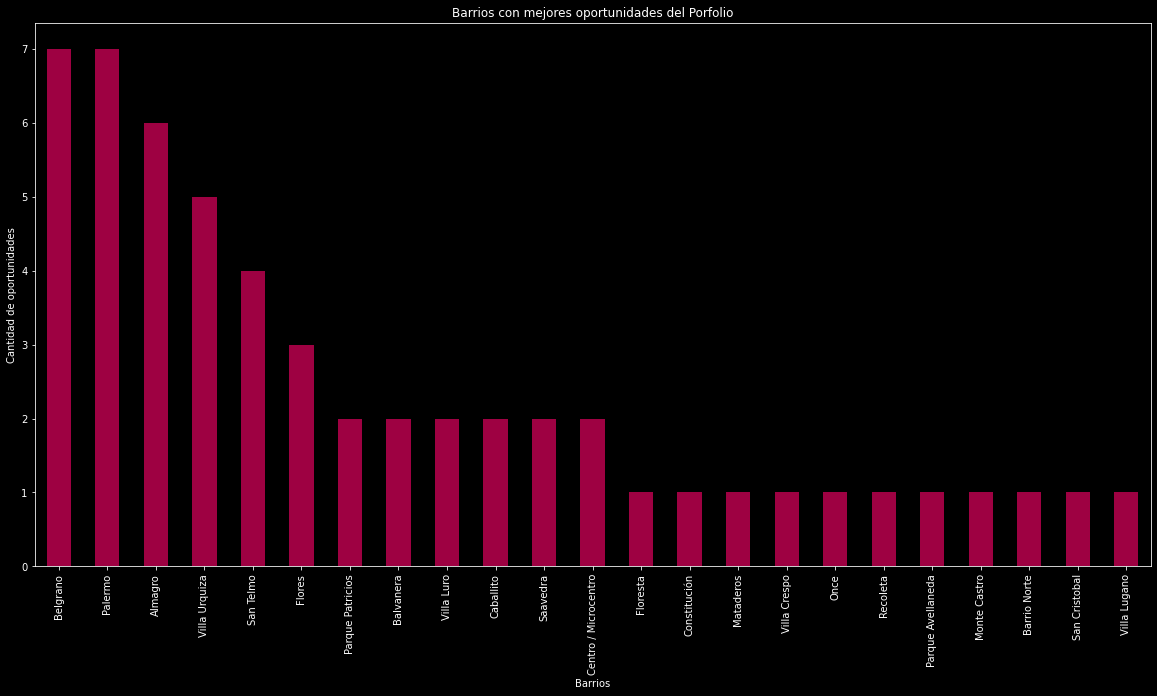

In [477]:
fig, ax = plt.subplots(figsize=(20, 10))
oportunidades_de_compra.place_name.value_counts().plot(kind='bar', ax=ax, colormap='Spectral')
ax.set_xlabel('Barrios')
ax.set_ylabel('Cantidad de oportunidades')
ax.set_title('Barrios con mejores oportunidades del Porfolio');

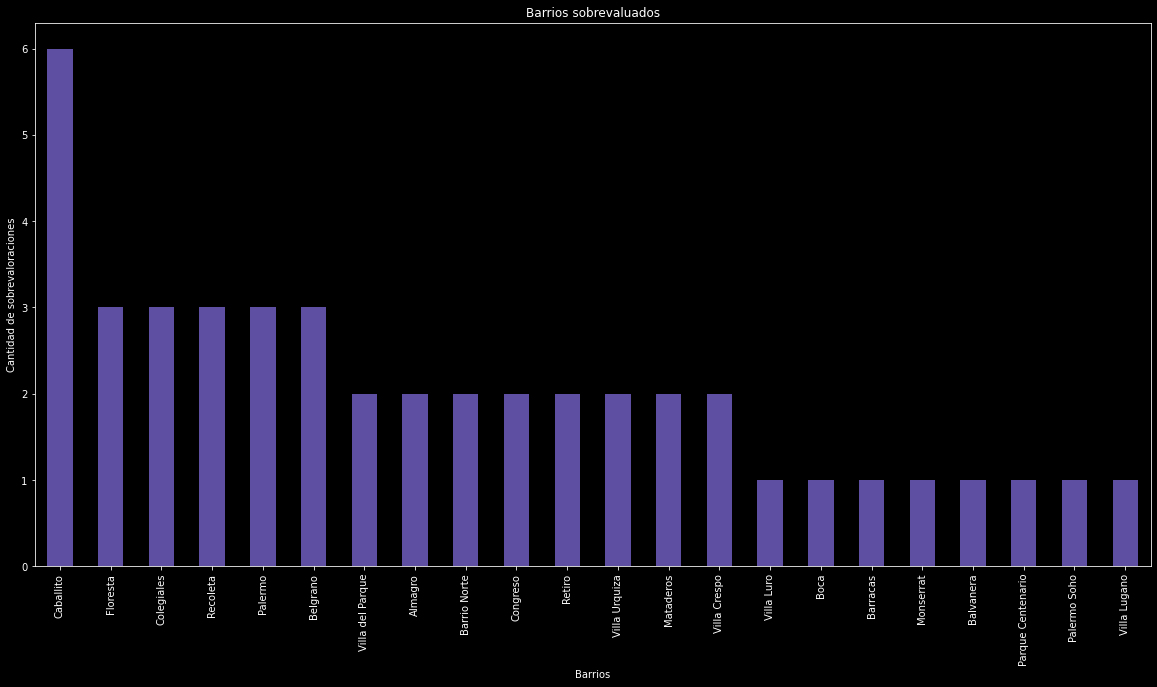

In [478]:
fig, ax = plt.subplots(figsize=(20, 10))
sobrevaluados.place_name.value_counts().plot(kind='bar', ax=ax, colormap='Spectral_r')
ax.set_xlabel('Barrios')
ax.set_ylabel('Cantidad de sobrevaloraciones')
ax.set_title('Barrios sobrevaluados');

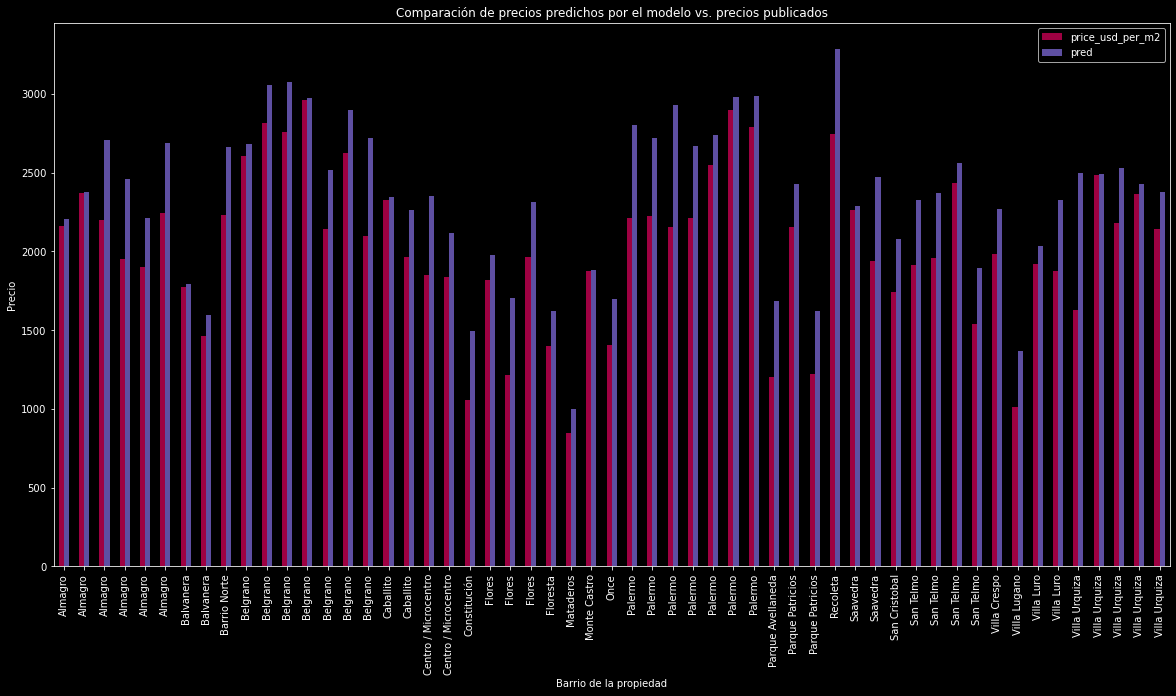

In [479]:
fig, ax = plt.subplots(figsize=(20, 10))
oportunidades_de_compra.set_index('place_name').sort_index().plot(kind='bar', ax=ax, colormap='Spectral')
ax.set_xlabel('Barrio de la propiedad')
ax.set_ylabel('Precio')
ax.set_title('Comparación de precios predichos por el modelo vs. precios publicados');

### Conclusiones:

Nuestro modelo final es capaz de explicar el .66 de la varianza total del precio en dólares por metro cuadrado y tiene un error promedio de 0.18 unidades de precio real.

A partir del protfolio podemos ver que, de acuerdo a nuestro modelo, hay buenas oportunidades de compra especialmente para los barrios de Belgrano y Palermo y que la diferncia de precio entre el valor predicho y el valor de la tasación actual es más grande para propiedades de Palermo, por lo cual éstas parecerían ser las mejores oportunidades.

Por otro lado, vemos que Caballito cuenta con la mayor cantidad de propiedades sobrevaluadas de nuestro portfolio.